# The scope of the project

This project examines data from an online dating service OKCupid and attempts to address a specific problem using the information given.

# Objective

The objective of this project is to use Data Analysis and Machine Learning skills
- To find out if smoking, alcohol consumption and substance usage can predict a user's age or not
- Explore the correlation between the body type of a user, alcohol consumption, and substance usage

In [1]:
# import modules
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Explore the data

In [2]:
# Load data into a dataframe
df = pd.read_csv("profiles.csv")

# Print out column names
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

### Description of variables
- age: continuous variable of age of user
- body_type: categorical variable of body type of user
- diet: categorical variable of dietary information
- drinks: categorical variable of alcohol consumption
- drugs: categorical variable of drug usage
- education: categorical variable of educational attainment
- ethnicity: categorical variable of ethnic backgrounds
- height: continuous variable of height of user
- income: continuous variable of income of user
- job: categorical variable of employment description
- offspring: categorical variable of children status
- orientation: categorical variable of sexual orientation
- pets: categorical variable of pet preferences
- religion: categorical variable of religious background
- sex: categorical variable of gender
- sign: categorical variable of astrological symbol
- smokes: categorical variable of smoking consumption
- speaks: categorical variable of language spoken
- status: categorical variable of relationship status
- last_online: date variable of last login
- location: categorical variable of user locations

#### And a set of open short-answer responses to :

- essay0: My self-summary
- essay1: What I’m doing with my life
- essay2: I’m really good at…
- essay3: The first thing people usually notice about me…
- essay4: Favorite books, movies, show, music, and food
- essay5: The six things I could never do without
- essay6: I spend a lot of time thinking about…
- essay7: On a typical Friday night I am…
- essay8: The most private thing I am willing to admit
- essay9: You should message me if…

In [3]:
# Print out informations on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

- The above indicate that only 3 columns are numeric ie. (age, height and income) whiles the rest are categorical

In [4]:
# Print out the length of the dataframe
len(df)

59946

m    35829
f    24117
Name: sex, dtype: int64


C:\Users\asante emmanuel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sex Counts')

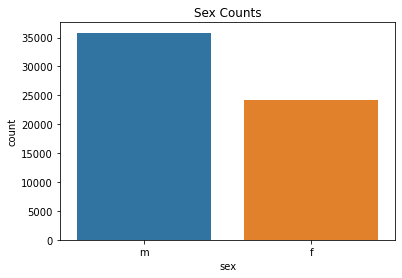

In [5]:
# Output the counts for male and female individual
print(df.sex.value_counts())

# Create a count plot for the number of males and females
sns.countplot(df.sex, order=df.sex.value_counts().index)
plt.title("Sex Counts")

- The distribution indicates that there are more men on the OkCupid platform as compare to the women

In [6]:
# Select the numeric columns
df_numeric = df[["age", "height", "income"]]

# Information about df_numeric
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     59946 non-null  int64  
 1   height  59943 non-null  float64
 2   income  59946 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [7]:
# Count the number of missing values
df_numeric.height.isnull().sum()

3

- The age and the income column do no have any missing value whiles the height column has $3$ missing values

In [8]:
# The mean height
df.height.mean()

68.29528051649066

In [9]:
# Replace the missing values with the mean value
df.height = df.height.fillna(df.height.mean())

In [10]:
# Select the numeric columns
df_numeric_update = df[["age", "height", "income"]]

In [11]:
# Information about df_numeric
df_numeric_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     59946 non-null  int64  
 1   height  59946 non-null  float64
 2   income  59946 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [12]:
# Inspect df_numeric
df_numeric_update.describe()

,age,height,income
count,59946.000000,59946.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994703,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


#### After exploring the data, the above statistics shows that
- The total number of individuals on the OkCupid platform is 59946
- The total number men and women are 35829 and 24117 respectively
- The data have only three columns which are numerical (i.e. age, height and income)
- The minimun and maximun age of male and female is about 18 and 110 years respectively with a mean age of about 30 years
- The minimun and maximun height of male and female is about 1 and 95 inches respectively with a mean height of about 68 inches
- The statistics for the income variable indicate that most users don't provide information about their income

## Cleaning Outliers

In [13]:
# Clear current plot
plt.clf()
# Cleaning up outliers
# Select individuals whose ages are less than 85 years and heights between 4 - 7.5 foot
user_df = df[(df["age"] < 85) & ((df["height"] >= 49) & (df["height"] < 90))]

<Figure size 432x288 with 0 Axes>

## Visualize and Analyze the ages of males and females

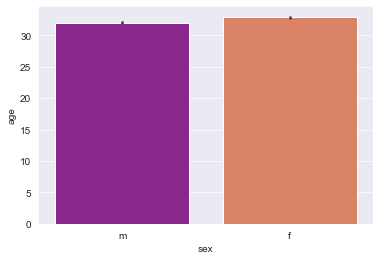

In [14]:
# set the background style of the plot
sns.set_style('darkgrid')
# plot the graph using the default estimator mean
sns.barplot(x="sex", y="age", data=user_df,  palette ='plasma')
# Show plot
plt.show()

- The countplot shows that the average age of females is greater than that of the males

<Figure size 432x288 with 0 Axes>

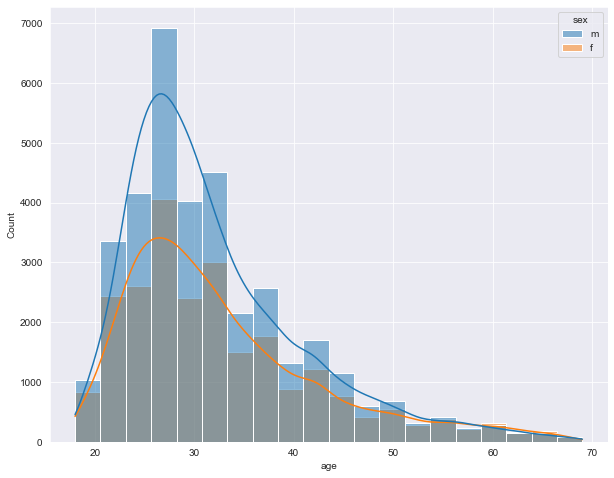

In [15]:
# Clear current plot
plt.clf()
# Create figure
plt.figure(figsize=(10, 8))
# Create histogram
sns.histplot(data=user_df, x="age", hue="sex", bins=20, kde=True)
# Show plot
plt.show()

- The distribution is skewed to the right, this demonstrates that there are more users who are younger than the average age.

<Figure size 432x288 with 0 Axes>

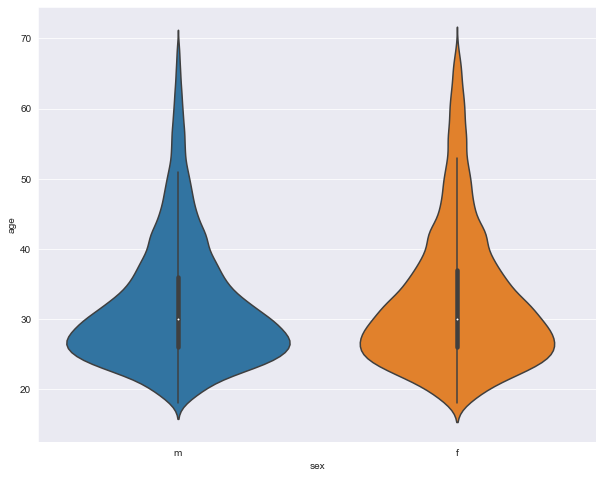

In [16]:
# Clear current plot
plt.clf()
# Create figure
plt.figure(figsize=(10, 8))
# Create violinplot
sns.violinplot(data=user_df, x="sex", y="age")
# Show plot
plt.show()

- The spread of the plot shows that the median age for male and female users is around 31 years as most user are younger than the median age

## Visualize and Analyze the heights of males and females

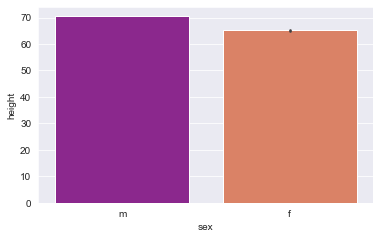

In [17]:
# Clear current plot
plt.clf()
# set the background style of the plot
sns.set_style('darkgrid')
# plot the graph using the default estimator mean
sns.barplot(x="sex", y="height", data=user_df,  palette ='plasma')
# Adjust the space between the two plots
plt.subplots_adjust(wspace=2, bottom=0.20)
# Show plot
plt.show()

- Males have a higher average height than girls, as shown in the graph above.

<Figure size 432x288 with 0 Axes>

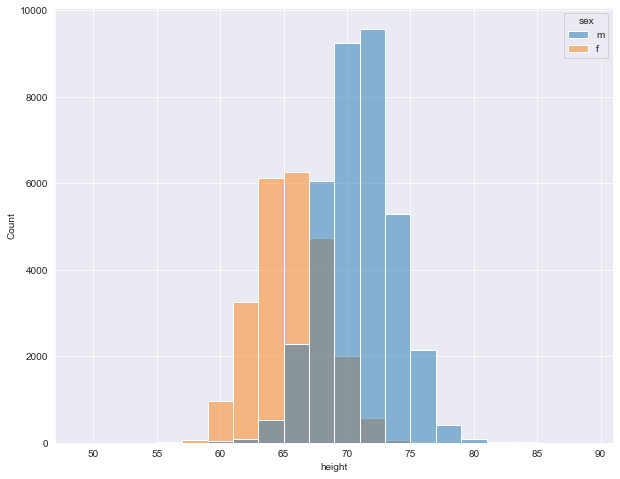

In [18]:
# Clear current plot
plt.clf()
# Create figure
plt.figure(figsize=(10, 8))
# Create histogram
sns.histplot(data=user_df, x="height", hue="sex", bins=20, kde=False)
# Show plot
plt.show()

- The distribution of heights not skewed indicating that the mean and median height for males and female are almost the same

<Figure size 432x288 with 0 Axes>

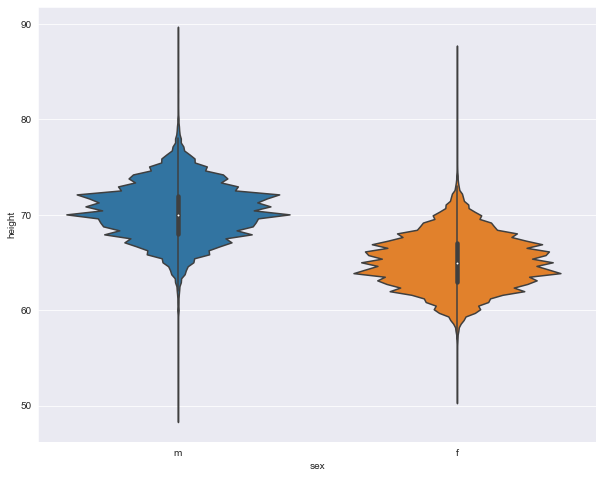

In [19]:
# Clear current plot
plt.clf()
# Create figure
plt.figure(figsize=(10, 8))
# Create violinplot
sns.violinplot(data=user_df, x="sex", y="height")
# Show plot
plt.show()

##### The violin plot show that,
- The median height for the males is around 70 inches
- The median height for females is around 65 inches
- Heights users (males and females) are spread around their respective average height 

# Analyzing the categorical columns of the data

In [20]:
# Loop through the columns of df to print out the categorical columns
for column in df.columns.to_list():
    if column != "age" and column != "height" and column != "income":
        print(column)

body_type
diet
drinks
drugs
education
essay0
essay1
essay2
essay3
essay4
essay5
essay6
essay7
essay8
essay9
ethnicity
job
last_online
location
offspring
orientation
pets
religion
sex
sign
smokes
speaks
status


<Figure size 432x288 with 0 Axes>

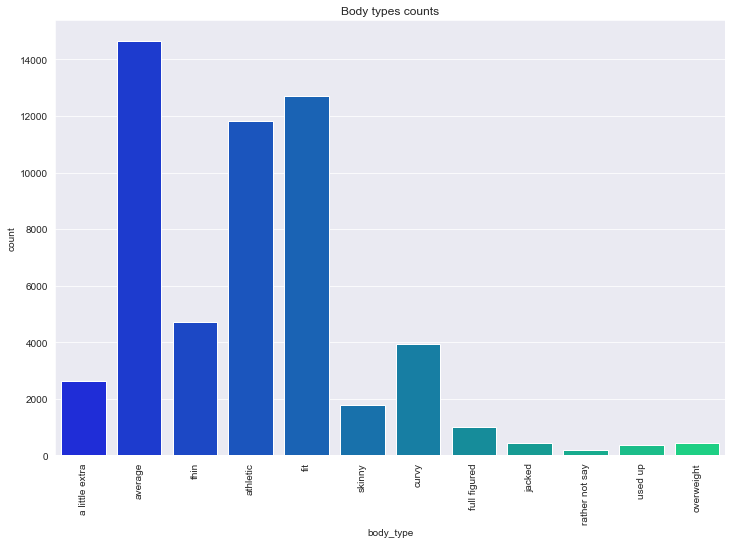

In [21]:
plt.clf()
plt.figure(figsize=(12, 8))
ax = plt.subplot()
sns.countplot(x="body_type", data=df, palette="winter")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title("Body types counts")
plt.show()

- This figure shows that most users are of average body_type whiles few users prefer not to talk about thiers

<Figure size 432x288 with 0 Axes>

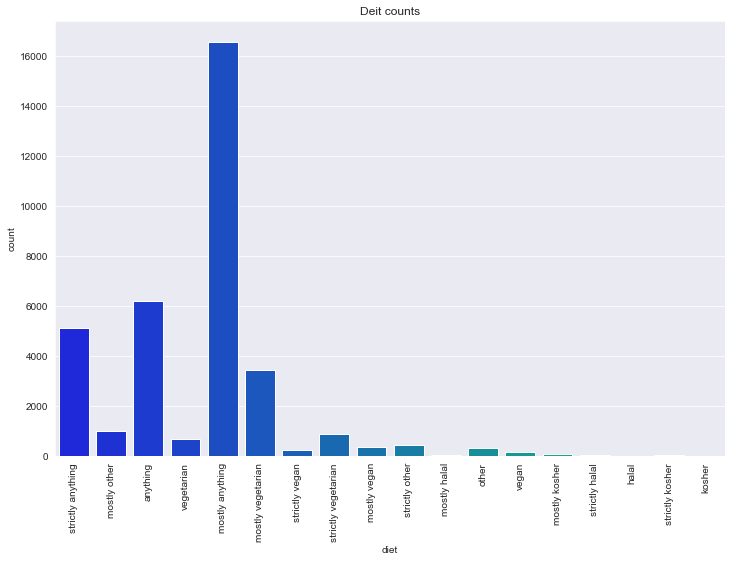

In [22]:
plt.clf()
plt.figure(figsize=(12, 8))
ax = plt.subplot()
sns.countplot(x="diet", data=df, palette="winter")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title("Deit counts")
plt.show()

- Greater percentage of users like to eat anything

In [23]:
df.drugs.value_counts()

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64

<Figure size 432x288 with 0 Axes>

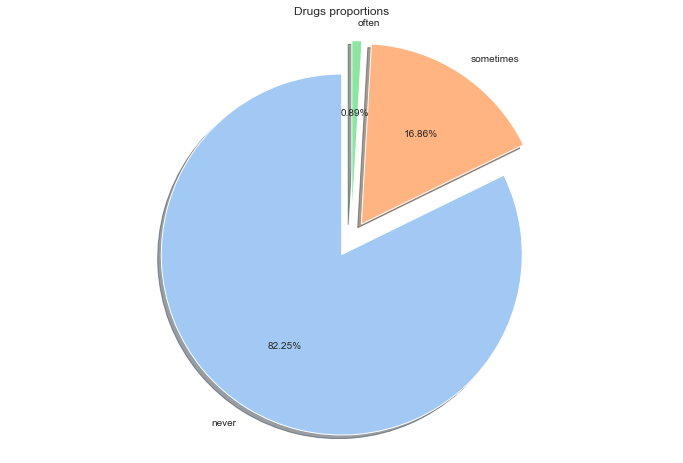

In [24]:
plt.clf()
plt.figure(figsize=(12, 8))
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.pie(df.drugs.value_counts(), labels=["never", "sometimes", "often"], colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1, 0.1), autopct="%0.2f%%")
plt.axis("equal")
plt.title("Drugs proportions")
plt.show()

#### The distribution shows that,
- About $82.25$% of the users have never use drugs before
- About $16.86$% of the users sometimes use drugs
- About $0.89$% of the users often use drungs

In [25]:
df.smokes.value_counts()

no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

<Figure size 432x288 with 0 Axes>

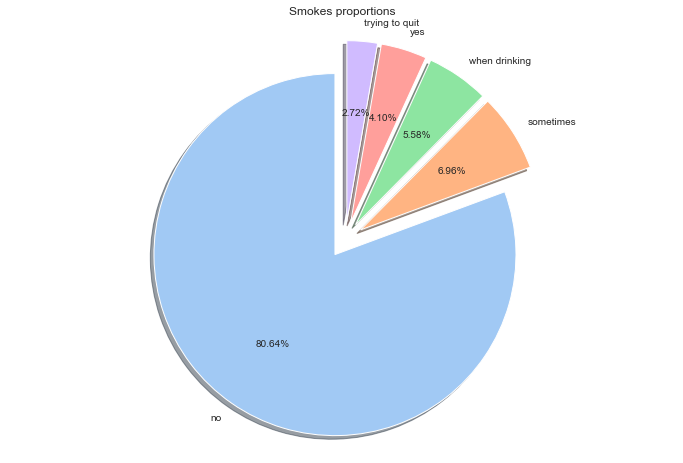

In [26]:
plt.clf()
plt.figure(figsize=(12, 8))
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.pie(df.smokes.value_counts(), labels=["no", "sometimes", "when drinking", "yes", "trying to quit"], colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1, 0.1, 0.1, 0.1), autopct="%0.2f%%")
plt.axis("equal")
plt.title("Smokes proportions")
plt.show()

- A greater percentage ($80.64$%) of the users do not smoke whiles the remaining do smoke

In [27]:
df.drinks.value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64

<Figure size 432x288 with 0 Axes>

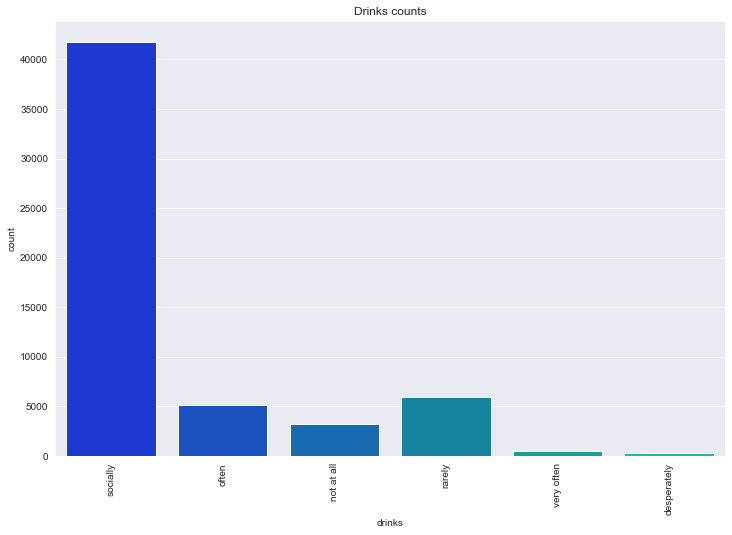

In [28]:
plt.clf()
plt.figure(figsize=(12, 8))
ax = plt.subplot()
sns.countplot(x="drinks", data=df, palette="winter")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.title("Drinks counts")
plt.show()

- The plot shows that most users consume alcohol 

# Questions
- What type of correlation exist between body_type, drinks (alcohol consumption), and drugs?
- Can smoking, alcohol consumption and substance usage be used to predict a user's age?

### Mapping values

In [29]:
# Fill missing values with the most frequently appearing values
df.smokes = df.smokes.fillna("no")
df.drugs = df.drugs.fillna("never")
df.drinks = df.drinks.fillna("socially")
df.body_type = df.body_type.fillna("average")

In [30]:
# Map smokes category values to some values
smokes_mapping = {"no": 0, "sometimes": 1, "when drinking": 2, "yes": 3, "trying to quit": 4}

# Create smokes_code column
df["smokes_code"] = df.smokes.map(smokes_mapping)

# Map drugs category values to some values
drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}

# Create drugs_code column
df["drugs_code"] = df.drugs.map(drugs_mapping)

# Map drinks category values to some values
drinks_mapping = {"socially": 0, "rarely": 1, "often": 2, "not at all": 3, "very often": 4, "desperately": 5}

# Create drinks_code column
df["drinks_code"] = df.drinks.map(drinks_mapping)

# Map body_type category values to some values
body_type_mapping = {'fit': 1,'thin': 3, 'average': 0,'athletic': 2,'curvy': 4,'a little extra': 5}

# Remove outliers
to_drop = ['skinny','full figured','overweight','jacked','used up','rather not say']
df = df[~df['body_type'].isin(to_drop)]

# Create body_type_codes column
df["body_type_codes"] = df.body_type.map(body_type_mapping)

### Data Normalization

In [31]:
# Get feature data
features_data = df[["drugs_code", "smokes_code"]]

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
# create a preprocessing model
min_max_scaler = MinMaxScaler()

# Train model
x_scaled = min_max_scaler.fit_transform(features_data.values)

# Get features data
features_data = pd.DataFrame(x_scaled, columns=features_data.columns)

# Clean features data
features_data_clean = np.array(features_data)[0:4000, :]

bodyType = df[["body_type_codes"]]
bodyType_clean = np.array(bodyType)[0:4000, :]

In [34]:
print(features_data_clean.shape)
print(bodyType_clean.shape)

(4000, 2)
(4000, 1)


### Classification

In [35]:
# Import module
from sklearn.model_selection import train_test_split

In [36]:
# Split data to a training and testing arrays
X_train, X_test, y_train, y_test = train_test_split(features_data_clean, bodyType_clean, train_size=0.8, test_size=0.2, random_state = 100)

### Naive Bayes

In [37]:
# Import module
from sklearn.naive_bayes import MultinomialNB

In [38]:
# Predict body type from smoke and drugs abuse using Naive Bayes Classifier

# Create a model object
classifier = MultinomialNB()

# Train the model
classifier.fit(X_train, y_train.ravel())

# calculate the model's accuracy
print(classifier.score(X_test, y_test))

0.33


- Using Naive Bayes, the model accuracy is about $33$%, meaning we cannot correctly predict the actual body type a user from smoke and drug abuse

### K-nearest Neighbors Classifier

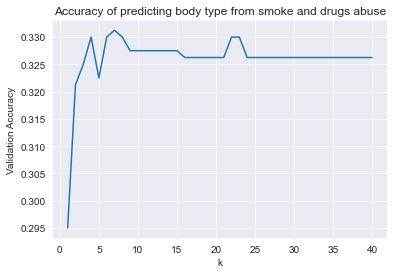

13.440027713775635 seconds


In [39]:
# Import modules
import time
from sklearn.neighbors import KNeighborsClassifier

# create a time object
start_time = time.time()

# Empty list
accuracies = []
# A list of integers from 1 to 40
k_list = list(range(1,41))

# Loop through some range of values
for k in range(1,41):
    # Create a model object
    classifier = KNeighborsClassifier(n_neighbors = k)
    # Train model
    classifier.fit(X_train, y_train.ravel())
    # Append accuracy score to the accuracies list
    accuracies.append(classifier.score(X_test, y_test.ravel()))

# Clear current plot
plt.clf()
# Create a line plot    
plt.plot(k_list, accuracies)
# Create x-axis label
plt.xlabel("k")
# Create y-axis label
plt.ylabel("Validation Accuracy")
# Create plot title
plt.title("Accuracy of predicting body type from smoke and drugs abuse")
# Show plot
plt.show()

print("%s seconds" % (time.time() - start_time))

### Linear Regression

training set score: 0.0012552715430660388
test set score: -0.0011649157882167582


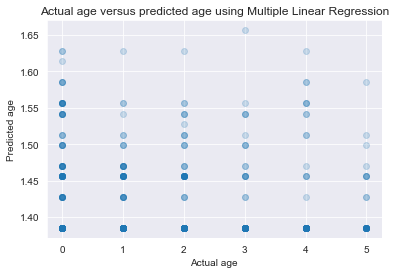

In [40]:
# Import module
from sklearn.linear_model import LinearRegression

# Create a linear regression model object
regr = LinearRegression()

# Train the model
regr.fit(X_train, y_train.ravel())

# Calculate the model's training accuracy
regr_training_score = regr.score(X_train, y_train.ravel())

# print out training set score
print("training set score: {}".format(regr_training_score))

# Calculate the model's accuracy
regr_test_score = regr.score(X_test, y_test.ravel())

# Print out the model's accuracy score
print("test set score: {}".format(regr_test_score))

# generate plot showing difference between predicted age and actual age using Multiple Linear Regression model

# Predict
regr_predictions = regr.predict(X_test)

plt.clf()
plt.scatter(y_test, regr_predictions, alpha=0.2)
plt.title("Actual age versus predicted age using Multiple Linear Regression")
plt.xlabel("Actual age")
plt.ylabel("Predicted age")
plt.show()

# Conclusion

### Findings,
- The total number of individuals on the OkCupid platform is 59946
- The total number men and women are 35829 and 24117 respectively
- The data have only three columns which are numerical (i.e. age, height and income)
- The minimun and maximun age of male and female is about 18 and 110 years respectively with a mean age of about 30 years
- The minimun and maximun height of male and female is about 1 and 95 inches respectively with a mean height of about 68 inches
- The statistics for the income variable indicate that most users don't provide information about their income
- The average age of females is greater than that of the males
- There are more users who are younger than the average age
- The median age for male and female users is around 31 years as most user are younger than the median age
- The mean and median height for males and female are almost the same

#### From the model,
- The accuracy score for the model indicates that, there is no relationship existing between the body type of a user, alcohol consumption, and substance usage
- Smoking, alcohol consumption and drug usage canno correctly predict a user's age